# Speech Emotion Recognition using Librosa library

## Data Gathering

The data was taken from the RAVDESS dataset. It consisted of the voices of 10 actors(both male and female included) expressing 8 emotions namely neutral, calm, happy, sad, angry, fearful, disgust and surprised.
Out of these, the model was trained on 4 emotions, namely, calm, happy, fearful and disgust. The number of audios involving these 4 emotions were 768 in the entire dataset. Hence, there were 768 rows in the dataset to be modelled.

## Data Exploration

In [1]:
#loading all the required python libraries
import librosa 
import librosa.display
import glob
import os
import soundfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import pandas as pd

In [2]:
#total 8 types of emotions that have been labelled using numbers from 1 to 8 in the RAVDESS dataset.
emotions={'01':'neutral','02':'calm','03':'happy','04':'sad','05':'angry','06':'fearful','07':'disgust','08':'surprised'}

### 1. Checking if the dataset in balanced or imbalanced

<BarContainer object of 8 artists>

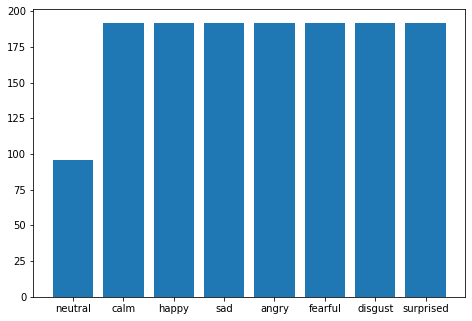

In [3]:
count={'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0}

for file in glob.glob("speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):
    name=os.path.basename(file)
    emo_no=name.split('-')[2]
    count[emo_no]=count[emo_no]+1

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(emotions.values(),count.values())


### 2. Visualising the audios in time domain

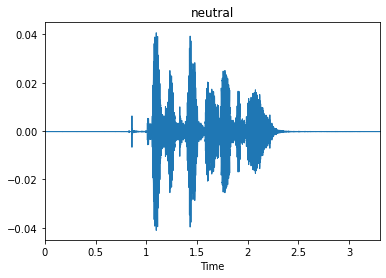

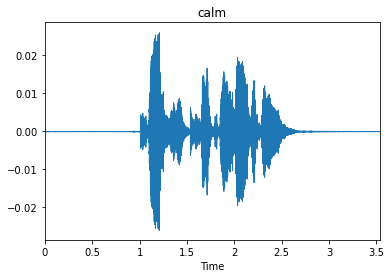

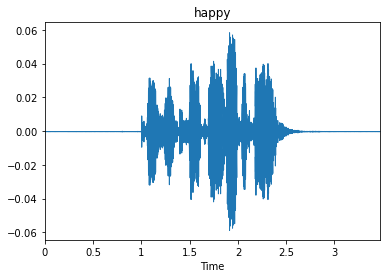

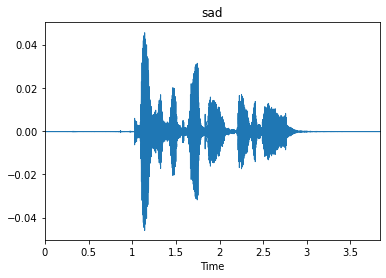

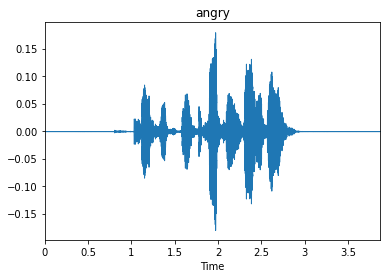

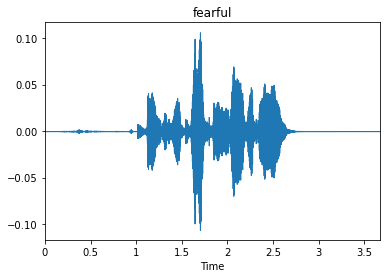

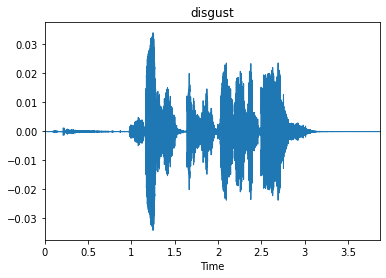

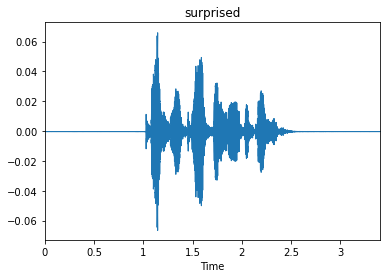

In [4]:
count={'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0}

for file in glob.glob("speech-emotion-recognition-ravdess-data\\Actor_01\\*"):
    name=os.path.basename(file)
    emo_no=name.split('-')[2]
    if count[emo_no]==0:
        data,sr=librosa.load(file)
        count[emo_no]=1
        plt.figure()
        plt.title(emotions[emo_no])
        librosa.display.waveplot(data,sr)

### 3. Visualising audios in frequency domain (fourier transform) 

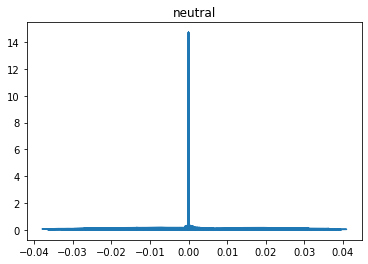

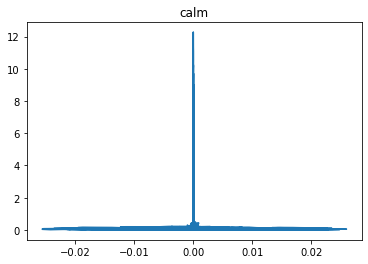

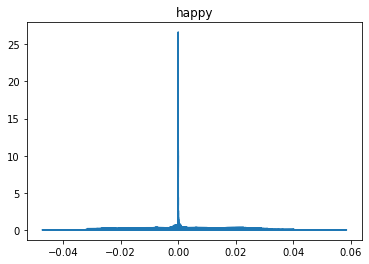

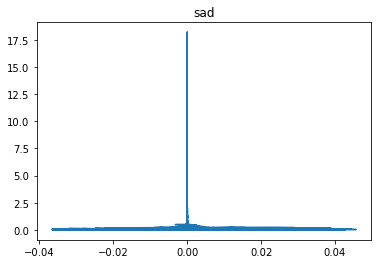

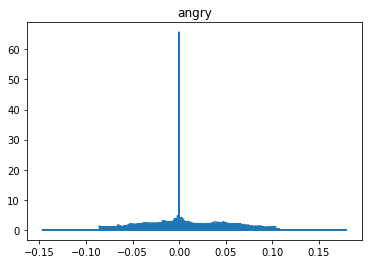

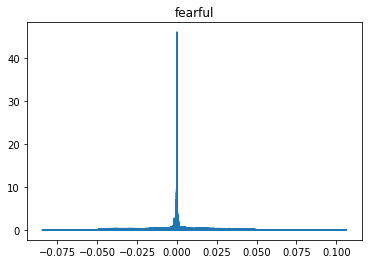

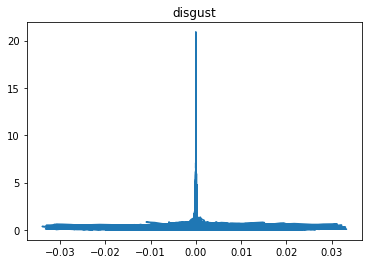

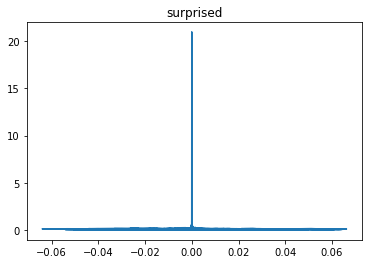

In [5]:
count={'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0}

for file in glob.glob("speech-emotion-recognition-ravdess-data\\Actor_01\\*"):
    name=os.path.basename(file)
    emo_no=name.split('-')[2]
    if count[emo_no]==0:
        data,sr=librosa.load(file)
        plt.figure()
        plt.title(emotions[emo_no])
        plt.plot(data, np.abs(fft(data)))
        count[emo_no]=1
        

In [6]:
#the 4 selected emotions
obs_emotions=['calm', 'happy', 'fearful', 'disgust']

### 4. Visualising the MFCC plot of the emotions selected for the model

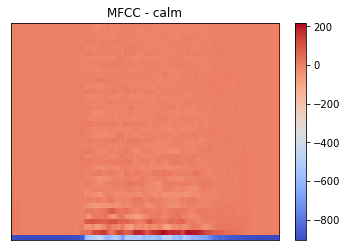

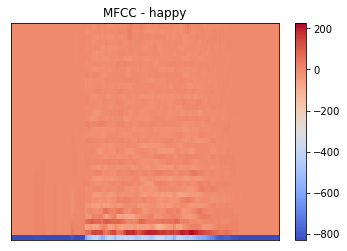

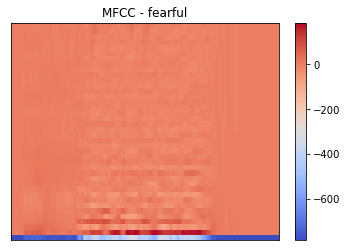

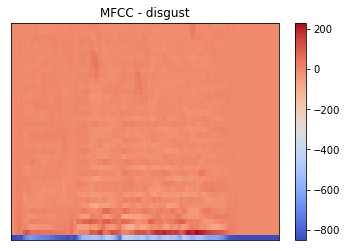

In [7]:
count={'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0}

for file in glob.glob("speech-emotion-recognition-ravdess-data\\Actor_01\\*"):
    name=os.path.basename(file)
    emo_no=name.split('-')[2]
    if count[emo_no]==0 and (emotions[emo_no] in obs_emotions):
        data,sr=librosa.load(file)
        fig, ax = plt.subplots()
        img = librosa.display.specshow(librosa.feature.mfcc(y=data, sr=sr,n_mfcc=40),sr=sr)
        fig.colorbar(img, ax=ax)
        ax.set(title="MFCC - "+emotions[emo_no])
        count[emo_no]=1 

    

### 5. Visualising the chroma spectrum of the selected emotions 

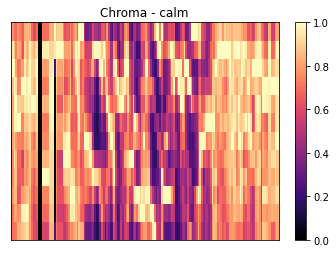

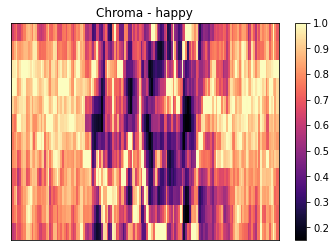

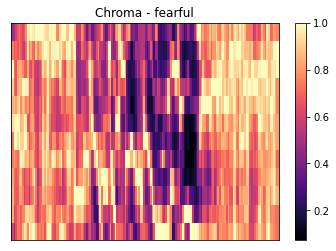

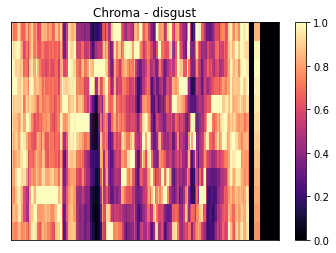

In [8]:
count={'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0}

for file in glob.glob("speech-emotion-recognition-ravdess-data\\Actor_01\\*"):
    name=os.path.basename(file)
    emo_no=name.split('-')[2]
    if count[emo_no]==0 and (emotions[emo_no] in obs_emotions):
        data,sr=librosa.load(file)
        fig, ax = plt.subplots()
        img = librosa.display.specshow(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr),sr=sr)
        fig.colorbar(img, ax=ax)
        ax.set(title="Chroma - "+emotions[emo_no])
        count[emo_no]=1 

### Conclusion
Through the above EDA, we can conclude that:
1. the given dataset has balanced data for the required model.
2. There exists differences in the MFCC and chroma spectrum among different emotions. Similarly, the mel spectrum also is unique to each emotion.This proves the fact that MFCC, chroma, etc are features that can be used in training the model to predict an emotion.

## Feature Extraction 

The features extracted were:
1. MFCC
2. Chroma
3. Mel
4. Spectral Contrast
5. Zero Crossing rate

It was found that the the accuracy was dependent majorly on Chroma, MFCC and Mel. Spectral Contrast and Zero Crossing rate didn't affect the accuracy of the model much.

In [9]:
#function to extract features from an audio file
def extract_feature(file_name):
    result=np.array([])
    
    sound_file=soundfile.SoundFile(file_name) 
    data=sound_file.read()
    sample_rate=sound_file.samplerate
    stft=np.abs(librosa.stft(data))
    
    
    mfccs=np.mean(librosa.feature.mfcc(data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result=np.append(result,mfccs)
   
    mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
    result=np.append(result,mel)
    
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.append(result,chroma)
        
    
    return result
    
    

In [10]:

c=1
df=pd.DataFrame()     #stores the features extracted from each audio file
index=[]              #stores the name of the feature
for file in glob.glob("speech-emotion-recognition-ravdess-data\Actor_*\\*.wav"):
        name=os.path.basename(file)
        emo_no=name.split('-')[2]
        emo_name=emotions[emo_no]
        if emo_name in obs_emotions:
            index.append(emo_name)
            feature=extract_feature(file)
            df[c]=feature
            c=c+1

In [11]:
df=df.T
df.index=index
df.reset_index(inplace=True)
df=df.rename(columns = {'index':'Emotion'})

In [12]:
df.head(5)

,Emotion,0,1,2,3,4,5,6,7,8,...,143,144,145,146,147,148,149,150,151,152
0,calm,-709.033504,55.766101,2.698180,16.391752,3.372371,-1.101144,-5.798338,-8.981228,-8.994223,...,0.696292,0.688255,0.679438,0.692962,0.699785,0.720104,0.734387,0.747514,0.774457,0.733428
1,calm,-695.378477,61.313124,-0.602172,14.277533,4.695726,-2.752941,-7.079349,-8.101913,-8.396766,...,0.637687,0.695775,0.673929,0.660938,0.708788,0.716342,0.736493,0.725195,0.746616,0.696542
2,calm,-687.338556,57.978223,0.120546,13.901187,1.862312,1.503660,-6.355483,-8.991887,-8.013114,...,0.714233,0.720158,0.710947,0.714800,0.718355,0.730364,0.756706,0.743555,0.743262,0.666154
3,calm,-684.722973,62.306275,-0.779712,15.710411,2.552247,1.159994,-6.514370,-9.151709,-7.505528,...,0.694594,0.702679,0.687856,0.691916,0.704613,0.723187,0.766601,0.775197,0.764649,0.722406
4,calm,-717.240421,63.731387,2.225929,15.644922,4.033845,-2.028954,-5.899799,-5.539160,-7.947823,...,0.674242,0.656241,0.643712,0.687830,0.712668,0.755658,0.733852,0.671269,0.681055,0.697828


## Data Analysis

In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
x_train, x_test, y_train,y_test=train_test_split(df.iloc[:,1:],df['Emotion'],test_size=0.25,random_state=4)

In [48]:
mlp_gs=MLPClassifier(max_iter=550)
parameter_space = {
    'hidden_layer_sizes': [(300,),(400,),(450,)],
    'alpha': [0.1,0.05,0.01],
    'batch_size':[32,64,128],
    'activation':['tanh','relu']
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)


print(clf.best_params_)
#print(mlp_gs)

{'activation': 'tanh', 'alpha': 0.1, 'batch_size': 128, 'hidden_layer_sizes': (400,)}


In [77]:
model=MLPClassifier(alpha=0.1,activation='tanh', batch_size=128,hidden_layer_sizes=(400,), max_iter=550)

## Training the model

In [78]:
# the model built before is passed in the training dataset
model.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.1, batch_size=128,
              hidden_layer_sizes=(400,), max_iter=550)

## Testing the model

In [79]:
y_pred=model.predict(x_test)

## Results

In [80]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print(accuracy*100)

69.79166666666666


In [81]:
results=pd.DataFrame(y_test)
results.index=np.arange(len(y_test))

results=pd.concat([results,pd.DataFrame(y_pred)],axis=1)
results=results.rename(columns = {'Emotion':'Actual',0:'Predicted'})

In [82]:
results

,Actual,Predicted
0,calm,calm
1,fearful,fearful
2,happy,happy
3,calm,calm
4,happy,happy
...,...,...
187,fearful,fearful
188,disgust,disgust
189,fearful,happy
190,happy,happy


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        calm       0.82      0.84      0.83        44
     disgust       0.79      0.59      0.67        51
     fearful       0.59      0.59      0.59        44
       happy       0.63      0.77      0.69        53

    accuracy                           0.70       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.71      0.70      0.70       192

